In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
from sklearn.metrics import f1_score

In [6]:
y_true =  [0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0]
y_pred =  [0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1]

### 计算F1_Score

In [5]:
f1_score(y_true,y_pred)

0.47058823529411764

In [4]:
f1_score?

In [3]:
from sklearn.metrics import precision_score, recall_score

In [7]:
precision_score(y_true, y_pred)

0.44444444444444442

In [8]:
recall_score(y_true,y_pred)

0.5

In [20]:
y_true =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0]
y_pred =  [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0]

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accu=accuracy_score(y_true,y_pred)
prec = precision_score(y_true,y_pred)
reca = recall_score(y_true,y_pred)
F1_score = f1_score(y_true,y_pred)
print('accuracy = %f, \n \
precision = %f, \n \
recall = %f,\n  \
F1_score = %f '% (accu, prec, reca, F1_score))

accuracy = 0.720000, 
 precision = 0.166667, 
 recall = 0.333333,
  F1_score = 0.222222 


### 练习计算与画ROC

1. 生成原始数据
2. 使用模型进行分类
3. 用ROC进行效果衡量

In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X,y = make_classification(n_samples=10000,n_features=10,n_classes=2,n_informative=5)


In [19]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)


In [20]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import roc_auc_score,roc_curve

preds = clf.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,preds)

df = pd.DataFrame(dict(fpr=fpr,tpr=tpr))


In [23]:
df.head()

,fpr,tpr
0,0.000000,0.001012
1,0.000000,0.010121
2,0.000988,0.010121
3,0.000988,0.074899
4,0.001976,0.074899


In [24]:
roc_auc= roc_auc_score(y_test,preds)

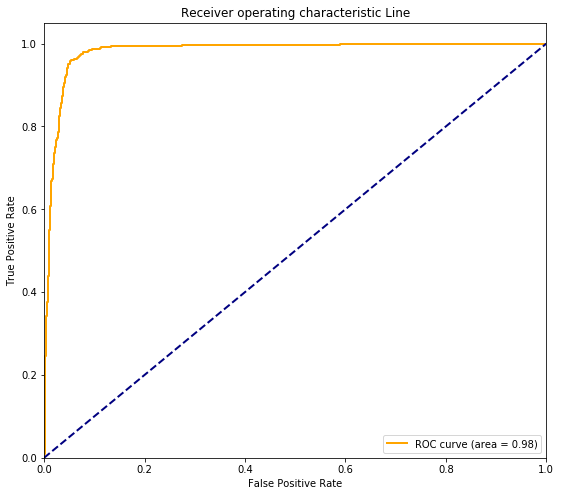

In [25]:
plt.figure(figsize=[9,8])
lw = 2

plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Line')
plt.legend(loc="lower right")
plt.show()